### Neshyba, 2023


# A kinetic-molecular approach to reversible expansion of an ideal gas

## Introduction
This CGI is all about exploring the question, what's going on at the molecular level when we carry out an isothermal reversible expansion of a gas? Why, for example, is it necessary for heat to go in, to maintain a constant temperature? 

Our basic premise here is that if we think about molecules hitting a receding wall, then they can be expected to bounce back with less speed, and therefore less kinetic energy. If we insist that the expansion be isothermal, that loss of kinetic energy would have to be compensated by an influx of heat from the surroundings.


## A hybrid (numerical+theoretical) kinetic-molecular approach

We'll begin with the result of an analysis of the physics of objects slamming against a receding wall. If we can assume that that process is elastic (as physicists like to do), one can show when those objects will bounce back,  their will be speed reduced by $2v_{wall}$. That reduction in speed, in turn, implies the kinetic energy of those objects (OK, molecules) will also be reduced. If we want our process to be isothermal, then we can say that this reduction in kinetic energy would have to be compensated by an equal inflow of heat from the surroundings. 

Kinetic-molecular theory says that this inflow of heat is given by

$$
dq_{kinetic} = -Z \times \delta KE \times A \times dt \ \ \ \ (1)
$$

This is a longish expression, but we hope you can see why it works, based on the factors that go into it:

- $Z$ is the frequency with which molecules hit our wall (typical units: mole / meter$^2$ / second). Kinetic theory says $Z = {1 \over 2} \rho \times v$, where $\rho$ is the number density of the gas (the factor ${1 \over 2}$ is there because only half the molecules at any given moment are heading toward the wall in question), and $v$ is the speed of the molecules in the gas. That speed, in turn, can be inferred from the equipartition theorem, which says that each degree of freedom (in this case, motion in the x-direction) has an average energy of ${1 \over 2}RT$. We can get from kinetic energy to speed using $KE = {1 \over 2}Mv^2$, where $M$ is the mass of a mole of molecules.
- $\delta KE$ is the change in kinetic energy of a mole of molecules hitting the receding wall (typical units: J/mol). As mentioned previously, for elastic collisions, each molecule's speed will be reduced by $2v_{wall}$ after it hits the wall.
- $A$ is the area of the wall getting hit (meter$^2$)
- $dt$ is the time (seconds) needed to for the wall to move out some distance $dx$, i.e, $dx=v_{wall}dt$. This is also related to the final volume, of course.

If these considerations don't convince you that Eq. 1 makes sense, you can try one more thing: do a unit analysis. If the right hand side has dimensions energy, we're on the right track!

## A simplified kinetic-molecular approach

The foregoing has a distinct numerical/algorithmic air to it. It will give results that are as accurate as you please, as long as you make $dt$ (and therefore $dx$) small enough. But the development also shows us how to use kinetic-molecular theory to get an analytical result. One key relationship is that $\delta KE = {\partial KE \over \partial v} \delta v$, where ${\partial KE \over \partial v}$ can be got from taking the derivative of $KE = {1 \over 2}Mv^2$, and $\delta v=2v_{wall}$. If you put all this together, and notice that $Adx=dV$, you can come up with

$$
dq_{kinetic,simplified} =  n M v^2 {dV \over V} \ \ \ \ (2)
$$


## Regular old thermodynamic theory

And what does Thermodynamics have to say about this? Going back to a very small expansion, we can say that the infinessimal work done by an expanding gas is $dw = -P_{ex}dV$. Under isothermal and reversible conditions, for an ideal gas, and invoking the 1st Law, this translates to 
 
$$
dq_{thermo} = nRT {dV \over V} \ \ \ \ (3)
$$

## The idea of this exericse
A test of the kinetic-molecular theory laid out above would, naturally, be to evaluate whether Eqs. 1, 2, and 3 give (close to) the same answers. If so, we can conclude that there's some validity to the notion that the heat that flows into an expanding gas is compensating for the reduction in the kinetic energy of molecules hitting the receding wall.

## Learning goals
The main learning goals of this exercise are 
1. I can provide a qualitative, molecular-level explanation for why heat must flow into a gas as it expands isothermally and reversibly.
1. I can use kinetic-molecular theory to predict the heat that flows into an ideal gas as it expands reversibly and isothermally.
1. I can explain the basis for that calculation, including the equipartition theory, elastic collision theory, and the frequency-of-collision theory. 
1. I can show that this formulation matches predictions using the the 1st Law of Thermodynamics, both for expansions that are tiny, and large (via integration).

In [1]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
%matplotlib notebook

In [2]:
# Constants
R = AssignQuantity(8.314,'joule/mol/K')
NA = AssignQuantity(6.02e23,'1/mol')
T = AssignQuantity(293,'K')
n = AssignQuantity(1,'mol')

# We're assuming O2 gas here
M = AssignQuantity(32,'g/mol')

### Kinetic theory associated with isothermal processes
The average kinetic energy in the x-direction, according to the equipartition theorem, is $KE = {1 \over 2}Mv^2$, where $M$ is the mass of a mole of molecules. Use that in the cell below to evaluate the average kinetic energy of a mole of our gas molecules, and then compute the RMS speed associated with that average.

In [3]:
# Average kinetic energy in the x-direction, using the equipartition theorem
### BEGIN SOLUTION
KE = 0.5*R*T;
KE.ito('kjoule/mol')
print(KE)
### END SOLUTION

# RMS speed associated with that average
### BEGIN SOLUTION
v = (2/M*KE)**.5
v.ito('m/s')
print(v)
### END SOLUTION

1.2180010000000001 kilojoule / mole
275.90770648896347 meter / second


### Specifying the initial and final states of our gas
In the cell below, we specify the initial state of our gas, and the box it's in. 

Initial volume =  24.000000000000007 decimeter ** 3
Initial distance in the x-direction =  5 decimeter
Sides of the wall =  2.1908902300206647 decimeter
dx =  0.2 decimeter
Final distance in the x-direction =  5.2 decimeter
Increase in volume =  0.9600000000000004 decimeter ** 3
Final volume =  24.960000000000008 decimeter ** 3


<IPython.core.display.Javascript object>


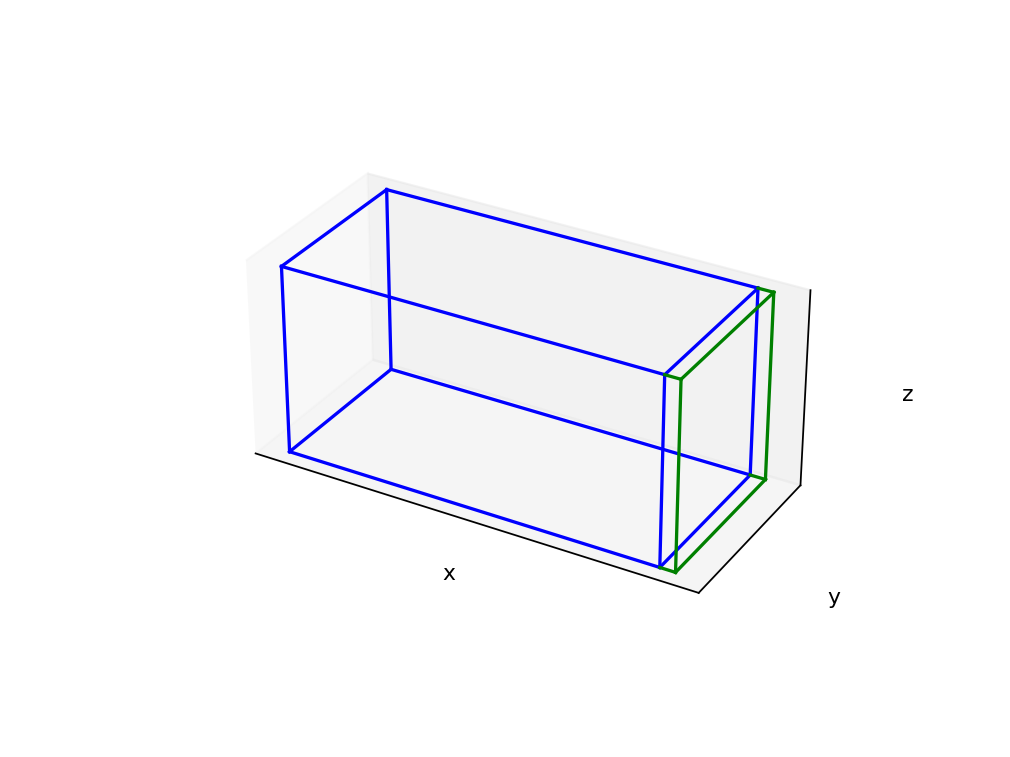

In [4]:
# Specify the initial volume of our gas 
Vinit = AssignQuantity(24,'liter')
Vinit.ito('dm^3')
print('Initial volume = ', Vinit)

# Specify the starting length in the x-direction
xinit = AssignQuantity(5,'decimeter')
print('Initial distance in the x-direction = ', xinit)

# Deduce the area in the y & z directions consistent with the initial x and volume
A = Vinit/xinit
y = z =  A**.5
print('Sides of the wall = ', A**.5)

# Specify the distance the wall will move out (should be small, on the order of millimeters)
dx = AssignQuantity(0.2,'decimeter')
print('dx = ', dx)

# Calculate the final x-dimension (xfinal)
xfinal = xinit+dx
print('Final distance in the x-direction = ', xfinal)

# Calculate the increase in volume (dV)
### BEGIN SOLUTION
dV = dx*A
print('Increase in volume = ', dV)
### END SOLUTION

# Calculate the final volume (V)
### BEGIN SOLUTION
Vfinal = Vinit+dV
print('Final volume = ', Vfinal)
### END SOLUTION

# Draw the box
fig = PL.drawbox_xx(xinit.magnitude,xfinal.magnitude,y.magnitude,z.magnitude)

### Hybrid kinetic-molecular theory of a tiny (infinitessimal) expansion of an ideal gas
The cell below is meant to lead up to the calculation of $dq_{kinetic}$.

In [5]:
# Specify the wall speed -- this should be small compared to the average molecular speed (for reversibility)
### BEGIN SOLUTION
wallspeed = AssignQuantity(10,'cm/s')
print('Wall speed = ', wallspeed)
### END SOLUTION

# Calculate the change in speed of a molecule hitting the wall (delta_v)
### BEGIN SOLUTION
delta_v = 2*wallspeed
print('Change in speed = ', delta_v)
### END SOLUTION

# We'll need the starting mole density of our gas (call it rho)
### BEGIN SOLUTION
rho = n/Vinit
rho.ito('mol/m^3')
print('Gas density = ', rho)
### END SOLUTION

# Calculate the collision frequency (Z) assuming half the molecules are moving toward the receding wall
### BEGIN SOLUTION
Z = rho/2*v
print('Collision frequency = ', Z)
### END SOLUTION

# Calculate the resulting change in KE per mole of molecules hitting the wall (delta_KE)
### BEGIN SOLUTION
delta_KE = .5*M*((v-delta_v)**2-v**2)
delta_KE.ito('kilojoule/mol')
print('Change in KE per mole of collisions =', delta_KE)
### END SOLUTION

# Calculate how long it takes to move that distance (dt)
### BEGIN SOLUTION
dt = dx/wallspeed
dt.ito('sec')
print('Infinitessimal time needed to expand out a bit = ', dt)
### END SOLUTION

# Calculate the heat required to compensate for the kinetic energy that is lost (dq_kinetic)
### BEGIN SOLUTION
dq_kinetic = -delta_KE*Z*A*dt
dq_kinetic.ito('joule')
print(dq_kinetic)
### END SOLUTION

Wall speed =  10 centimeter / second
Change in speed =  20 centimeter / second
Gas density =  41.66666666666665 mole / meter ** 3
Collision frequency =  5748.07721852007 mole / meter ** 2 / second
Change in KE per mole of collisions = -0.0017651693215293344 kilojoule / mole
Infinitessimal time needed to expand out a bit =  0.2 second
97.4047638135677 joule


### A simplified  formula for computing the infinitessimal heating for a small expansion
It'll be handy to have a "functionalized" way of computing the infinitessimal heating for a small expansion. We do that in the cell below, making use of Eq. 2 in the Introduction.

In [6]:
def get_dq_kinetic_simplified(n, M, v, V, dx, A):
    ###  This is a functionalized computation of the infinitessimal heating for a small expansion. ###
    
    dV = A*dx
    dq_kinetic = n*M*v**2*dV/V
    dq_kinetic.ito('joule')
    
    return dq_kinetic

# Testing the algorithm -- hopefully we get the same dq as what we got before
dq_kinetic_simplified = get_dq_kinetic_simplified(n, M, v, Vinit, dx, A)
print('dq (simplified) = ', dq_kinetic_simplified)

dq (simplified) =  97.44008000000004 joule


### Pause for analysis
In the cell below, calculate the % difference between the results we've obtained so far (i.e., Eq. 1 vs Eq. 2).

In [7]:
### BEGIN SOLUTION
difference = (dq_kinetic_simplified/dq_kinetic-1)*100
print(difference)
### END SOLUTION

0.03625714497901278 dimensionless


### Thermodynamics of an infinitessimal expansion
Below, calculate the infinitessimal amount of heat that has to go in to maintain isothermal conditions for reversible expansion of an ideal gas by a tiny amount ($dV$), according to thermoynamics (Eq. 3).

In [8]:
# The infinitessimal dq according to thermo (dq_thermo) -- see Eq. 3
### BEGIN SOLUTION
dq_thermo = n*R*T*dV/Vinit
dq_thermo.ito('joule')
print(dq_thermo)
### END SOLUTION

97.44008000000001 joule


### Pause for analysis
Calculate (and print) the difference (%) between the infinitessimal heat amount obtained from kinetic theory, and your thermodynamic result (i.e., Eq. 2 vs Eq. 3).

By the way, in situations like this, if an error is $<10^{-10} \%$, you can assume that it is due to precision issues (like how precise Python stores floating point numbers). That is, differences that small are not meaninful.

In [9]:
### BEGIN SOLUTION
error = (dq_kinetic_simplified-dq_thermo)/dq_thermo*100
print('Error = ', error)
### END SOLUTION

Error =  2.916839706043345e-14 dimensionless


### Refreshing and saving your code
1. Use the dropdown menu Kernel/Restart
2. Use the dropdown menu Cell/Run All Above
3. Under the "File" dropdown menu item in the upper left is a disk icon. Press it now to save your work (you can, do this at any time as you're working on an assignment, actually).

### Validating
This step will help ensure that you didn't miss something (although it's not a guarantee). Find the "Validate" button and press it. If there are any errors or warnings, fix them.

### Finishing up
Assuming all this has gone smoothly, carry out three more steps (but read this carefully before starting):
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page